In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import sklearn as sns 

In [2]:
data =pd.read_csv("D:\\data\\spam_sms.csv")

In [3]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.duplicated().any()

True

In [7]:
data=data.drop_duplicates()

In [8]:
data.duplicated().any()

False

In [9]:
data.shape

(5169, 2)

In [10]:
import seaborn as sns

In [11]:
data['v1'].value_counts()

v1
ham     4516
spam     653
Name: count, dtype: int64

In [12]:
data.rename(columns={'v1':'target' , 'v2':"text"}, inplace=True)

In [13]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#calculating the length of message 
data['length']=data['text'].apply(len)

In [15]:
data.head()

,target,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

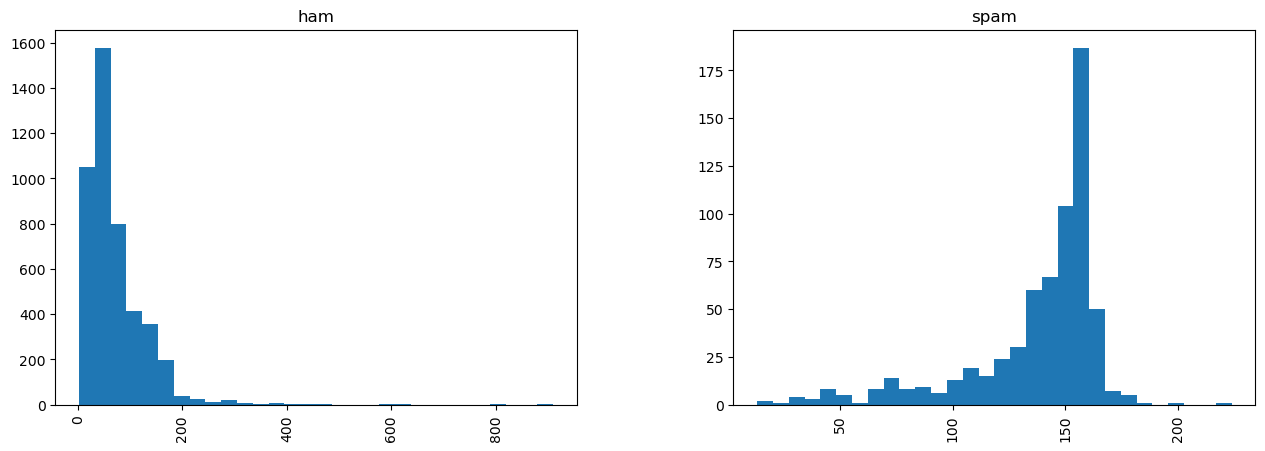

In [16]:
%matplotlib inline
# plotting the length of ham and  spam
data.hist(by='target', column='length' , bins=30 , figsize = [15,5])

In [17]:
# converting target data to numeric data 
data['numeric']=data.target.map({'ham':0 , 'spam': 1 })
data.head()

,target,text,length,numeric
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


In [18]:
x=data['text']

In [19]:
y=data['numeric']

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
x_train , x_test , y_train , y_test =train_test_split(x , y , test_size=.20 , random_state=42)

In [22]:
x_train.head()

2228                       Those were my exact intentions
5529                            What about this one then.
2149                   Waaaat?? Lololo ok next time then!
5058    Free video camera phones with Half Price line ...
5051    Tick, tick, tick .... Where are you ? I could ...
Name: text, dtype: object

In [23]:
y_train.head()

2228    0
5529    0
2149    0
5058    1
5051    0
Name: numeric, dtype: int64

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
# converting fearture to numeric vector 
x_train=vect.fit_transform(x_train)
x_test=vect.fit_transform(x_test)

In [25]:

#Loading all classifier
svc = SVC(kernel = 'linear')
mnb = MultinomialNB(alpha =0.2)
gnb  = GaussianNB()
lr = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=100,random_state=11)
abc = AdaBoostClassifier(n_estimators =100,random_state=11)

In [26]:
#defining functions for training and testing data

def training(clf,x_train,y_train):
    clf.fit(x_train,y_train)
    
#function for predicting labels

def predict(clf,x_test):
    return clf.predict(x_test)

In [27]:
#defining a dictionary of classifier

#defining a dictionary of classifier
classifier={'SVM': svc , 'MultinomialNB': mnb,'GaussianNB': gnb,'logistic': lr,'RandomForest': rfc,'Adaboost': abc}

In [28]:
#predict and storing score of each classifier
score = []
for n,c in classifier.items():
    training(c,x_train.toarray(),y_train)
    pred = predict(c,x_test.toarray())
    score.append((n,[accuracy_score(y_test,pred,normalize=True)]))
    

ValueError: X has 3362 features, but SVC is expecting 7657 features as input.